# Dataset and Preprocessing

Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

Loading the CIFAR-10 dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 111s 1us/step


Converting images to grayscale

In [3]:
def rgb_to_grayscale(rgb_images):
    return np.dot(rgb_images[...,:3], [0.2989, 0.5870, 0.1140])

x_train_gray = rgb_to_grayscale(x_train).astype(np.float32)
x_test_gray = rgb_to_grayscale(x_test).astype(np.float32)


Normalizing the data

In [4]:
x_train_gray /= 255.0
x_test_gray /= 255.0

Flatten the images for k-NN

In [16]:
x_train_gray_flattened = x_train_gray.reshape(x_train_gray.shape[0], -1)
x_test_gray_flattened = x_test_gray.reshape(x_test_gray.shape[0], -1)

Checking the shape of y_train and x_train_gray_flattened

In [17]:
print("x_train_gray_flattened shape:", x_train_gray_flattened.shape)
print("y_train shape:", y_train.shape)

x_train_gray_flattened shape: (50000, 1024)
y_train shape: (40000, 1)


Adjust x_train_gray_flattened to match y_train in size

In [21]:
x_train_gray_flattened_adjusted = x_train_gray_flattened[:y_train.shape[0]]

In [22]:
print("Adjusted x_train_gray_flattened shape:", x_train_gray_flattened_adjusted.shape)
print("y_train shape:", y_train.shape)

Adjusted x_train_gray_flattened shape: (40000, 1024)
y_train shape: (40000, 1)


In [23]:
y_train = y_train.reshape(-1)

# Model Building and Evaluation

In [18]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Initialize variables for storing results

In [12]:
k_values = range(1, 6)  # Example range, adjust based on assignment requirements
accuracy_l1 = {k: [] for k in k_values}  # For Manhattan distance
accuracy_l2 = {k: [] for k in k_values}  # For Euclidean distance

5-Fold Cross-Validation

In [13]:
kf = KFold(n_splits=5, shuffle=True)

In [24]:
for train_index, test_index in kf.split(x_train_gray_flattened_adjusted):
    X_train, X_val = x_train_gray_flattened_adjusted[train_index], x_train_gray_flattened_adjusted[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    for k in k_values:
        # Manhattan distance (L1)
        knn_l1 = KNeighborsClassifier(n_neighbors=k, p=1)
        knn_l1.fit(X_train, y_train_fold)
        predictions_l1 = knn_l1.predict(X_val)
        accuracy_l1[k].append(accuracy_score(y_val_fold, predictions_l1))

        # Euclidean distance (L2)
        knn_l2 = KNeighborsClassifier(n_neighbors=k, p=2)
        knn_l2.fit(X_train, y_train_fold)
        predictions_l2 = knn_l2.predict(X_val)
        accuracy_l2[k].append(accuracy_score(y_val_fold, predictions_l2))


# Results and Analysis

Calculating average accuracy for each K

In [25]:
avg_accuracy_l1 = {k: np.mean(v) for k, v in accuracy_l1.items()}
avg_accuracy_l2 = {k: np.mean(v) for k, v in accuracy_l2.items()}

Plotting the accuracy results

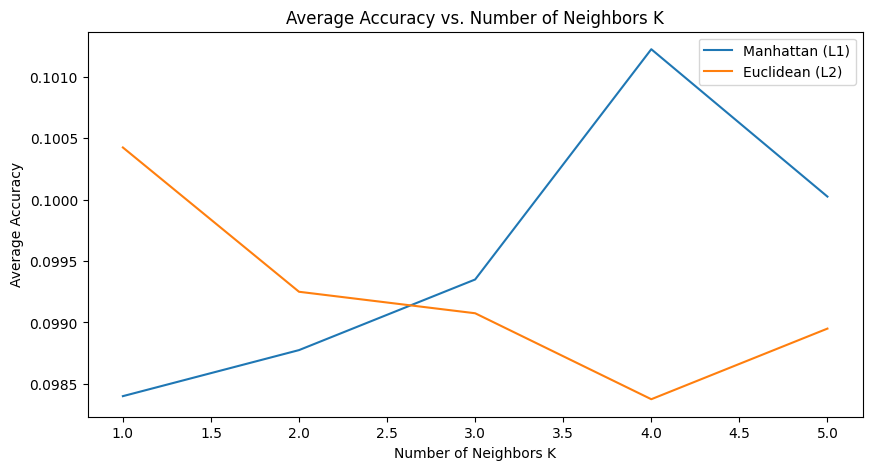

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(list(avg_accuracy_l1.keys()), list(avg_accuracy_l1.values()), label='Manhattan (L1)')
plt.plot(list(avg_accuracy_l2.keys()), list(avg_accuracy_l2.values()), label='Euclidean (L2)')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy vs. Number of Neighbors K')
plt.legend()
plt.show()

#Discussion

From the graph, it appears that the average accuracy for both distance metrics fluctuates as the value of K changes. This is expected behavior in k-NN classifiers as different values of K can significantly affect the decision boundary of the classifier.

Manhattan (L1) Distance: 

The graph shows a general trend where accuracy either decreases or remains relatively flat as K increases. This might indicate that, for this dataset, having a smaller number of neighbors makes the classifier more sensitive to the local structure of the data, which could be beneficial given the right context or specific characteristics of the data.

Euclidean (L2) Distance: 

The accuracy for Euclidean distance shows more variance across different K values. There's a noticeable peak K=4, which might indicate an optimal balance between the classifier's bias and variance at this specific value of K for the dataset.

When comparing the two metrics, it's important to consider the characteristics of the CIFAR-10 dataset, which contains images that can vary in terms of pixel intensity and spatial arrangement. Manhattan distance might capture variations in pixel intensity better due to its summation of absolute differences, whereas Euclidean distance may better capture geometric differences.

Given the output, the choice between L1 and L2 distances could be influenced by the specific application and what kind of errors are more tolerable. For example, if certain misclassifications are more costly than others, you might prefer the distance metric that minimizes those particular errors.

Additionally, it's important to note that the overall accuracy levels are quite low. This suggests that k-NN might not be the best model for image classification tasks like CIFAR-10, or that additional feature engineering, data preprocessing (like dimensionality reduction techniques), or advanced models (such as convolutional neural networks) might yield better results.

# Top 5 predictions

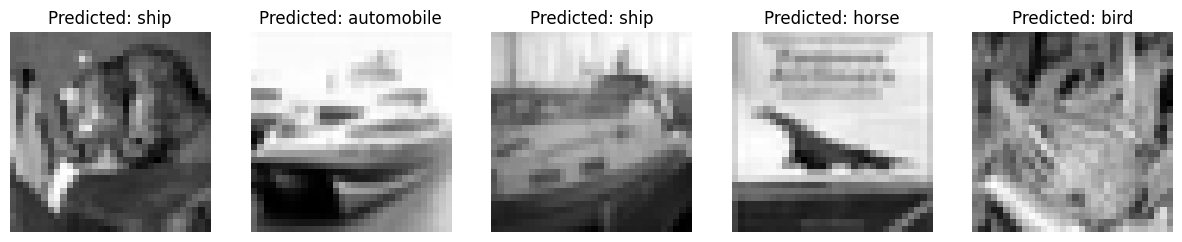

In [29]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Mapping of CIFAR-10 class labels to human-readable names
cifar10_class_names = {
    0: 'airplane', 
    1: 'automobile', 
    2: 'bird', 
    3: 'cat', 
    4: 'deer',
    5: 'dog', 
    6: 'frog', 
    7: 'horse', 
    8: 'ship', 
    9: 'truck'
}

# Retrain the model with the best hyperparameters
best_k = 4  # Replace with the best K you found
best_distance_metric = 'euclidean'  # Or 'manhattan' if L1 was better

# Create and train the k-NN classifier
best_model = KNeighborsClassifier(n_neighbors=best_k, metric=best_distance_metric)
best_model.fit(x_train_gray_flattened_adjusted, y_train)

# Make predictions on the test set
test_predictions = best_model.predict(x_test_gray_flattened[:5])

# Display the test images and their predicted class names
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, (image, prediction) in enumerate(zip(x_test_gray[:5], test_predictions)):
    axes[i].imshow(image, cmap='gray')
    predicted_class_name = cifar10_class_names[prediction]
    axes[i].set_title(f'Predicted: {predicted_class_name}')
    axes[i].axis('off')
plt.show()
